In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-detection/Train_data.csv
/kaggle/input/network-intrusion-detection/Test_data.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/network-intrusion-detection/Train_data.csv')
test_df=pd.read_csv('/kaggle/input/network-intrusion-detection/Test_data.csv')

In [3]:
train_df.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal


In [4]:
train_df.shape

(25192, 42)

In [5]:
test_df.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0


In [6]:
test_df.shape

(22544, 41)

In [7]:
for col in ['protocol_type', 'service', 'flag']:
    print(f"Unique values in {col}: {train_df[col].nunique()}")
    print(train_df[col].value_counts()[:10])  # Show top 10
    print("-" * 50)


Unique values in protocol_type: 3
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64
--------------------------------------------------
Unique values in service: 66
service
http        8003
private     4351
domain_u    1820
smtp        1449
ftp_data    1396
eco_i        909
other        858
ecr_i        613
telnet       483
finger       366
Name: count, dtype: int64
--------------------------------------------------
Unique values in flag: 11
flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
Name: count, dtype: int64
--------------------------------------------------


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [10]:
# Check for missing values
print(train_df.isnull().sum())



duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
print(test_df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
# Check duplicate rows in train and test dataset
print(f"Duplicate Rows in Train: {train_df.duplicated().sum()}")
print(f"Duplicate Rows in Test: {test_df.duplicated().sum()}")

Duplicate Rows in Train: 0
Duplicate Rows in Test: 57


In [13]:
test_df = test_df.drop_duplicates()

In [14]:
print("New Test Shape:", test_df.shape)

New Test Shape: (22487, 41)


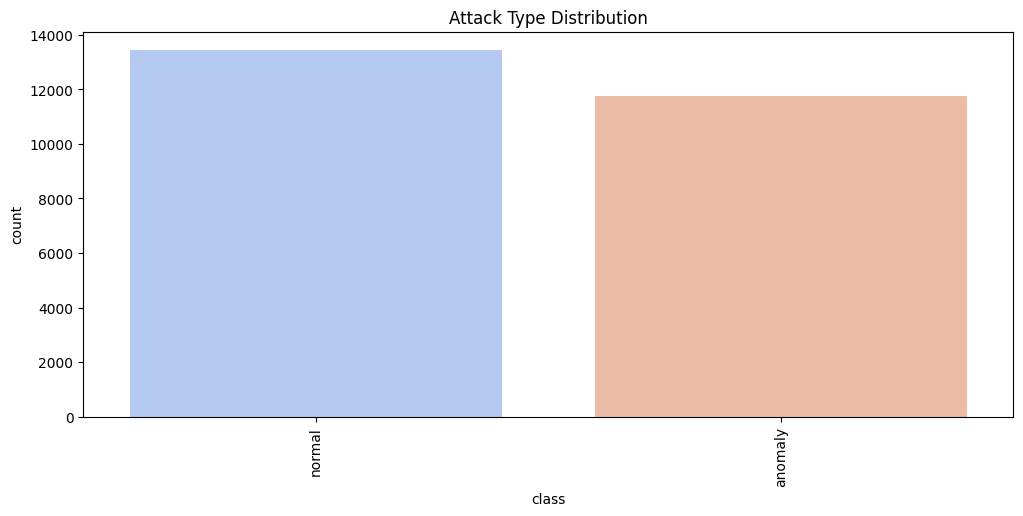

class
normal     53.385996
anomaly    46.614004
Name: proportion, dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.countplot(x=train_df['class'], order=train_df['class'].value_counts().index, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Attack Type Distribution")
plt.show()

# Print attack class distribution
print(train_df['class'].value_counts(normalize=True) * 100)


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe
df_encoded = train_df.copy()

# Identify categorical columns
categorical_cols = ['protocol_type', 'service', 'flag', 'class']

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed later

# Select only numeric columns for correlation
numeric_df = df_encoded.select_dtypes(include=[np.number])

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


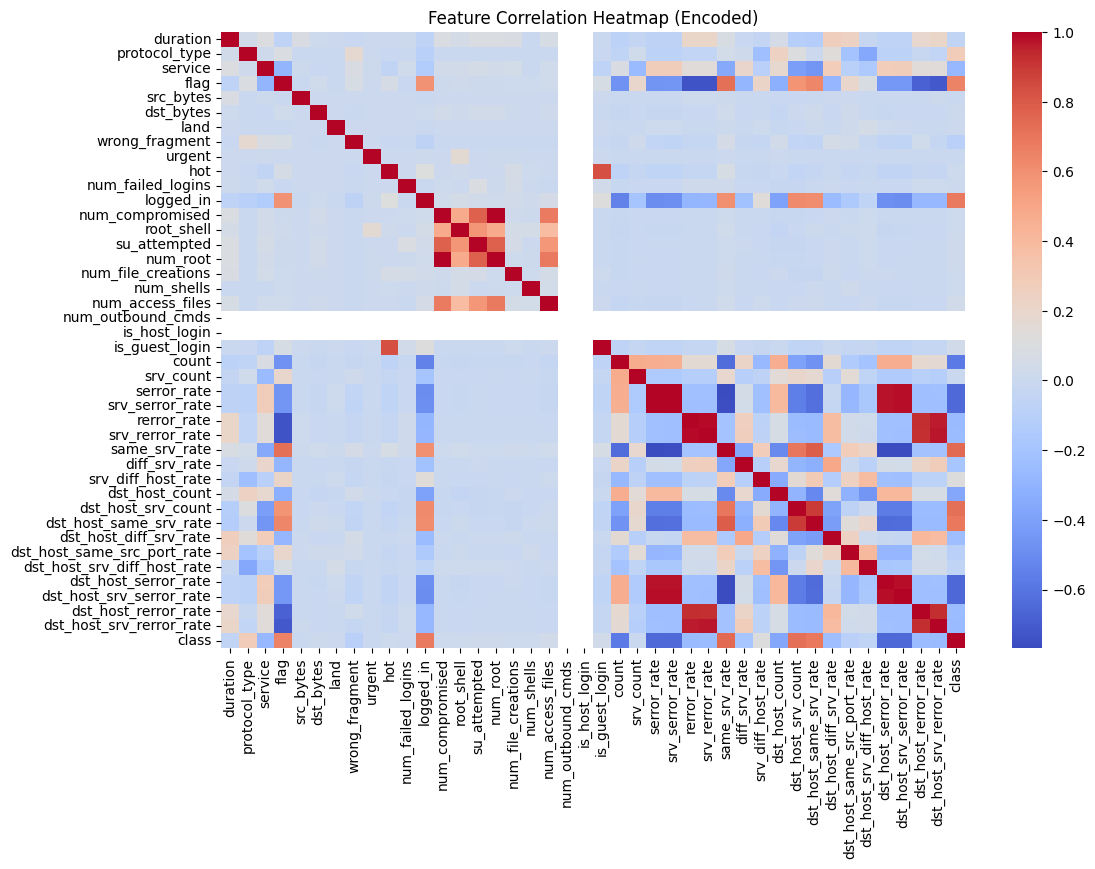

In [17]:
# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap (Encoded)")
plt.show()

In [18]:
columns_to_drop = [
    "num_outbound_cmds", 
    "is_host_login", 
    "dst_host_same_srv_rate", 
    "same_srv_rate", 
    "dst_host_srv_diff_host_rate"
]

train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True) 

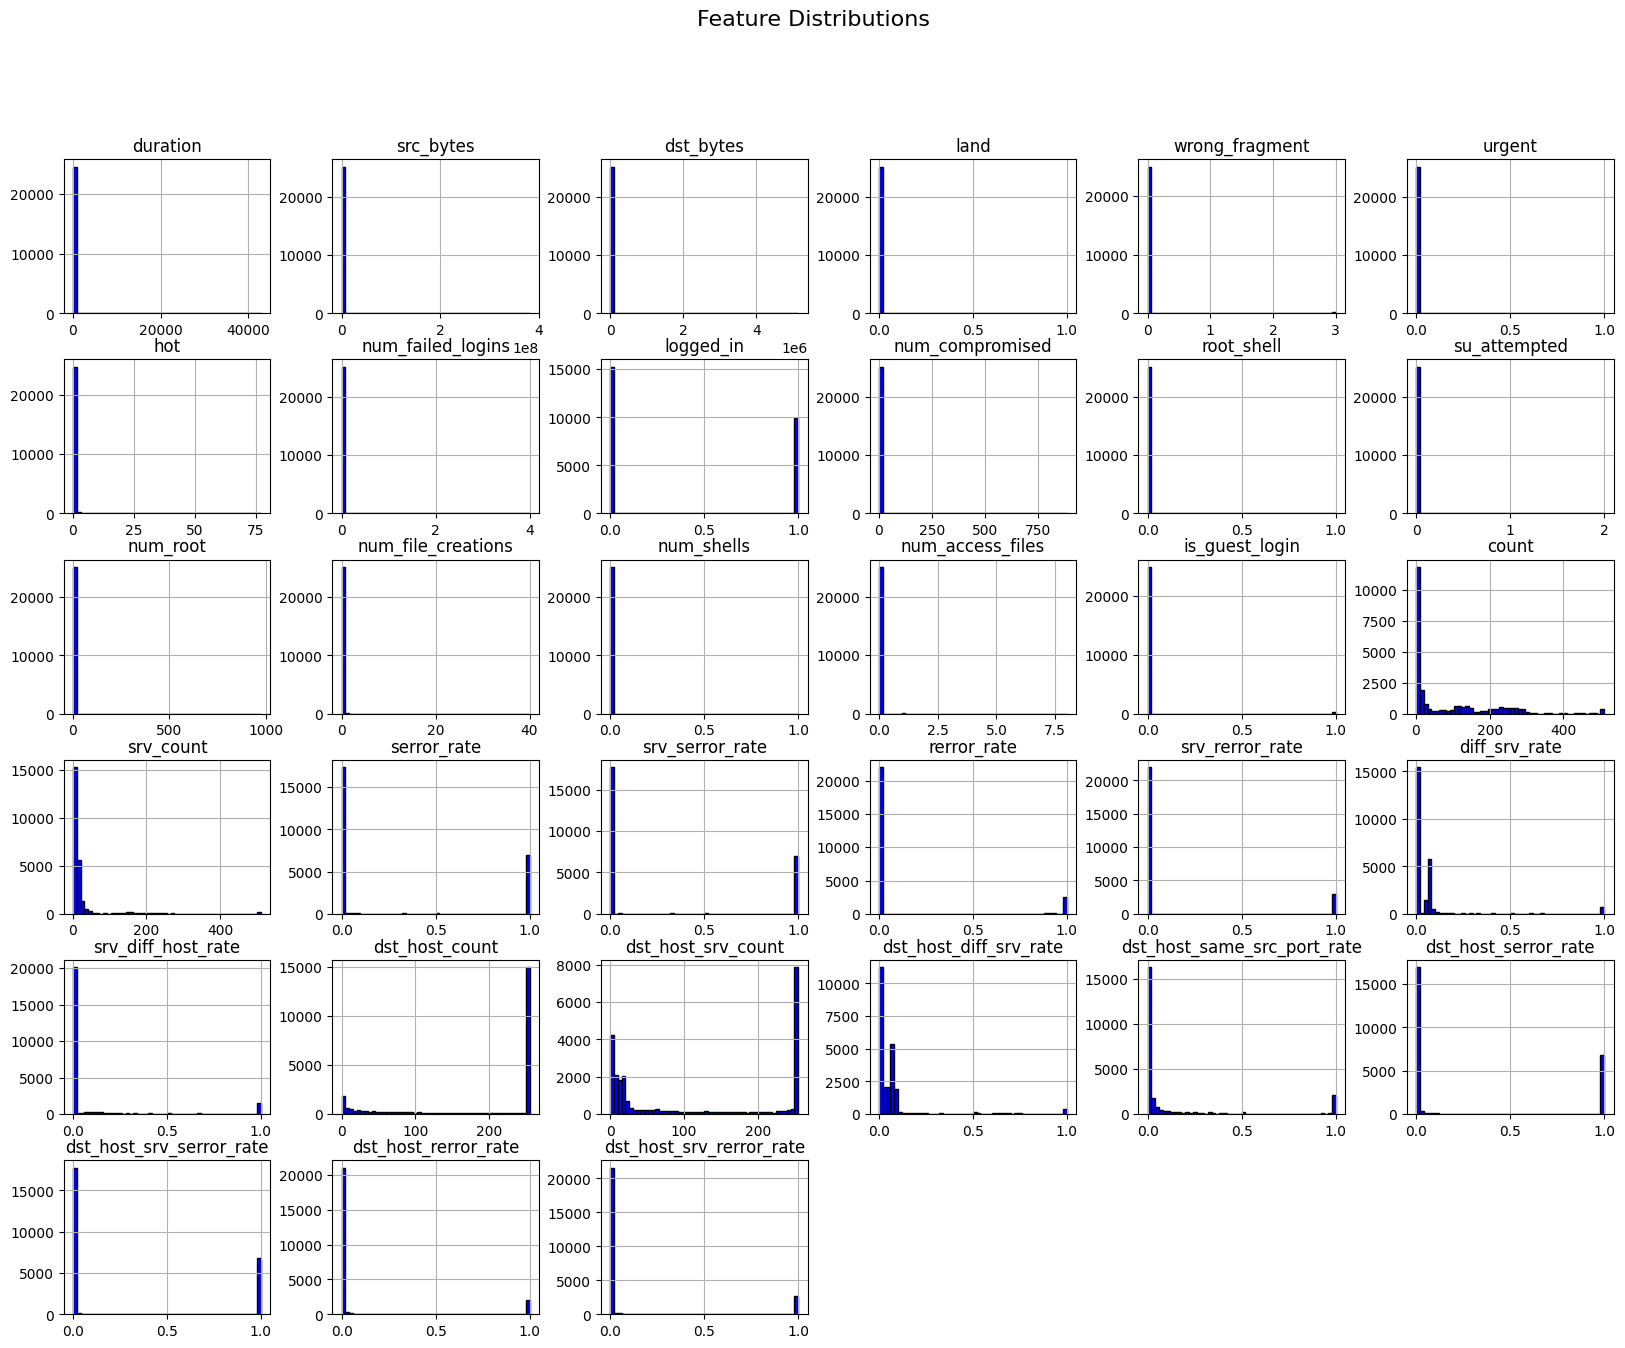

In [19]:

train_df.hist(figsize=(20, 15), bins=50, color="blue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [20]:
skewed_features = ["src_bytes", "dst_bytes", "count"]
for col in skewed_features:
    train_df[col] = np.log1p(train_df[col])
    test_df[col] = np.log1p(test_df[col])


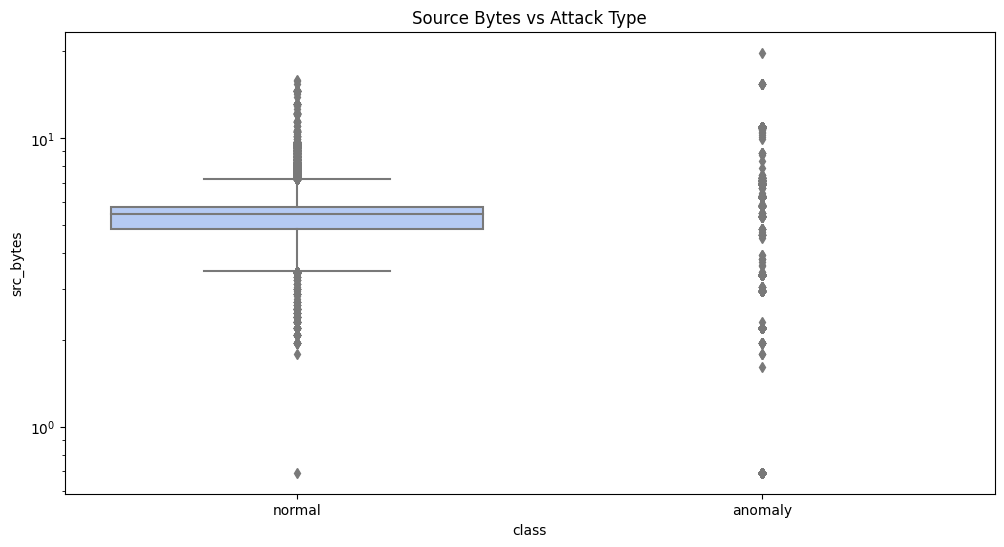

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df['class'], y=train_df['src_bytes'], palette="coolwarm")
plt.title("Source Bytes vs Attack Type")
plt.yscale("log")  # Apply log scale for better visualization
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df["src_bytes"] = scaler.fit_transform(train_df[["src_bytes"]])
test_df["src_bytes"] = scaler.transform(test_df[["src_bytes"]])


In [23]:


correlation = numeric_df.corr()['class'].sort_values(ascending=False)
print(correlation)


class                          1.000000
same_srv_rate                  0.749237
dst_host_srv_count             0.719292
dst_host_same_srv_rate         0.692212
logged_in                      0.688084
flag                           0.651309
protocol_type                  0.283653
srv_diff_host_rate             0.120649
is_guest_login                 0.038662
num_access_files               0.036999
su_attempted                   0.025851
num_root                       0.019753
num_compromised                0.018620
root_shell                     0.018579
num_file_creations             0.018322
num_shells                     0.013454
hot                            0.012839
dst_bytes                      0.010949
num_failed_logins             -0.000028
land                          -0.000605
srv_count                     -0.002370
src_bytes                     -0.005743
urgent                        -0.006743
duration                      -0.050901
dst_host_srv_diff_host_rate   -0.062928


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [24]:
# Drop features highly correlated with others (threshold = 0.9)
corr_matrix = numeric_df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Dropped Features:", highly_correlated_features)
numeric_df = numeric_df.drop(columns=highly_correlated_features)



Dropped Features: ['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [25]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = numeric_df.drop(columns=['class'])  # Features
y = numeric_df['class']  # Target variable

# Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (20153, 34)
Testing Set Shape: (5039, 34)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9976185751141099
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [27]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9982139313355824
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [28]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.5314546537011312
              precision    recall  f1-score   support

           0       0.75      0.00      0.01      2365
           1       0.53      1.00      0.69      2674

    accuracy                           0.53      5039
   macro avg       0.64      0.50      0.35      5039
weighted avg       0.63      0.53      0.37      5039



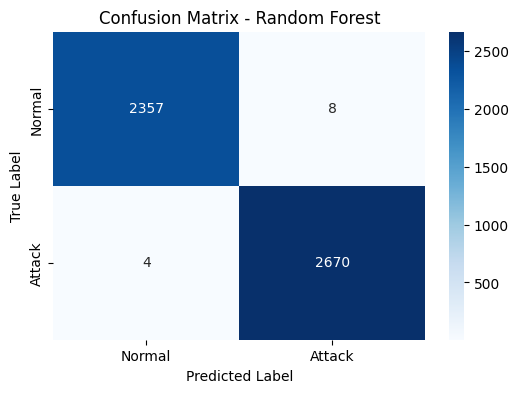

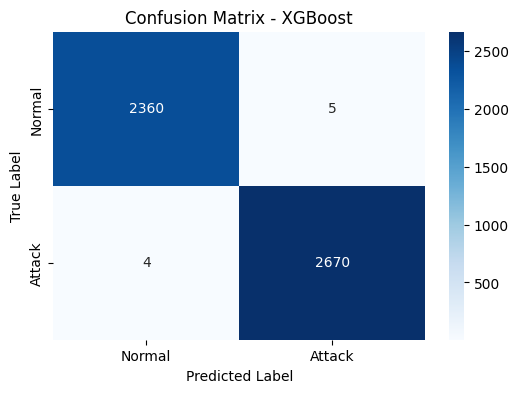

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Plot for XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


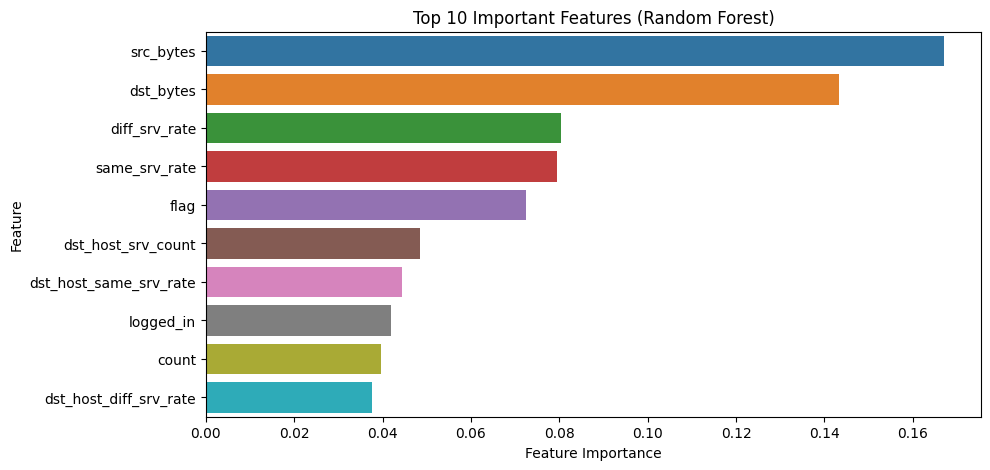

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


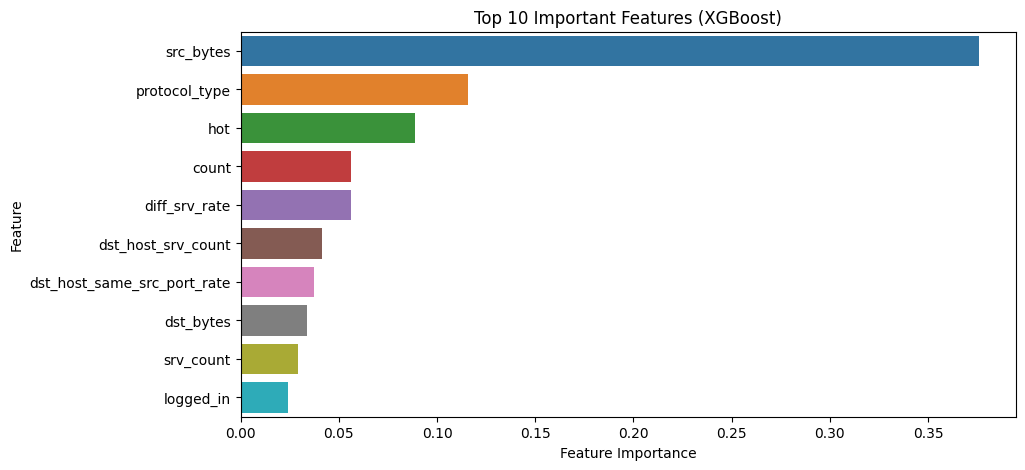

In [30]:
import numpy as np

# Get feature importance
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Sort indices
sorted_rf_indices = np.argsort(rf_importances)[::-1]
sorted_xgb_indices = np.argsort(xgb_importances)[::-1]

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=rf_importances[sorted_rf_indices][:10], y=[feature_names[i] for i in sorted_rf_indices[:10]])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_importances[sorted_xgb_indices][:10], y=[feature_names[i] for i in sorted_xgb_indices[:10]])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (XGBoost)")
plt.show()


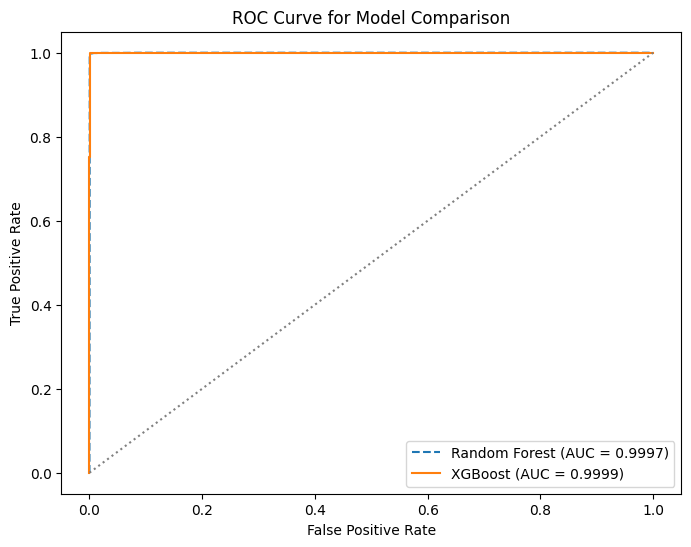

In [31]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for both models
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability for class 1
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# Compute AUC (Area Under Curve)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})", linestyle='--')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.4f})", linestyle='-')

plt.plot([0, 1], [0, 1], color='grey', linestyle='dotted')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Model Comparison")
plt.legend()
plt.show()


In [32]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')